In [4]:
# Williams Percentage Range (Williams %R) with the Symmetric Triangle pattern - XRP

In [5]:
! pip install yfinance pandas numpy matplotlib scipy

[*********************100%%**********************]  1 of 1 completed


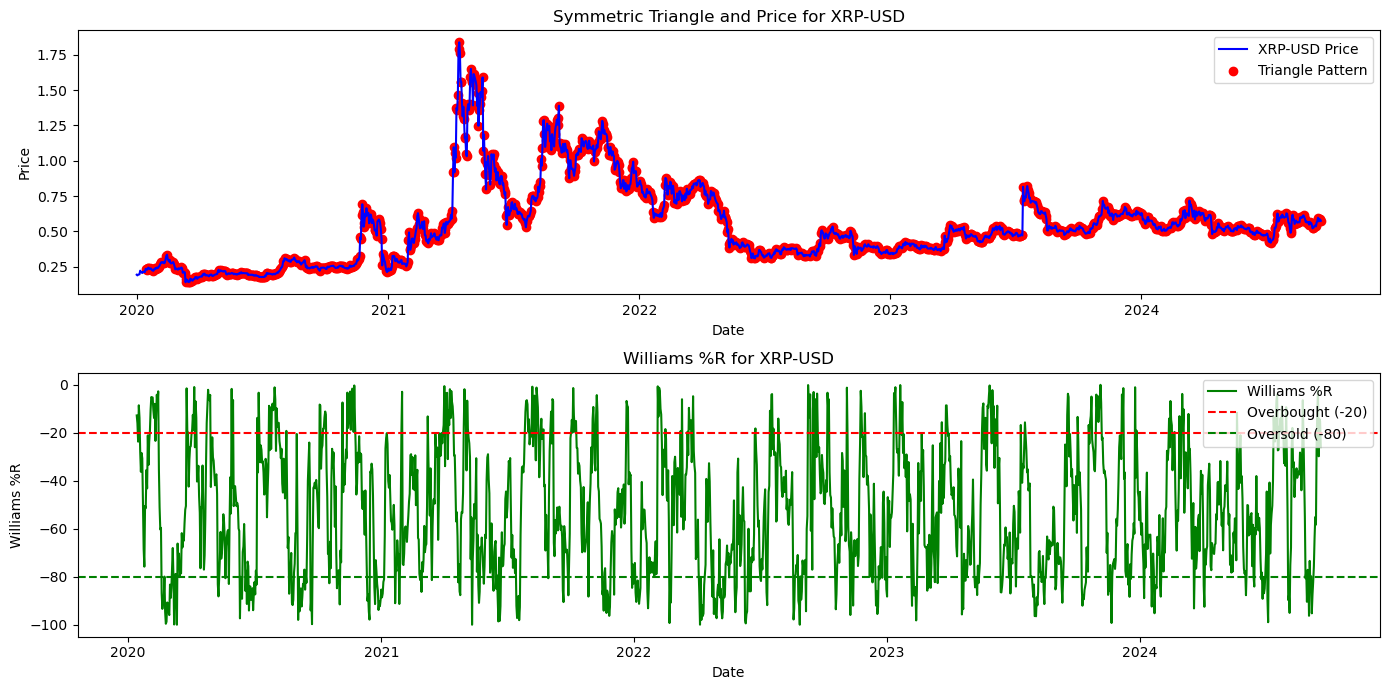

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Fetch historical data for a given ticker
def fetch_data(ticker, start_date):
    data = yf.download(ticker, start=start_date)
    return data

# Calculate Williams %R
def williams_r(data, lookback_period=14):
    highest_high = data['High'].rolling(window=lookback_period).max()
    lowest_low = data['Low'].rolling(window=lookback_period).min()
    williams_r = (highest_high - data['Close']) / (highest_high - lowest_low) * -100
    data['Williams %R'] = williams_r
    return data

# Function to detect symmetric triangle pattern
def detect_symmetric_triangle(data, lookback_period=14):
    # Local minima and maxima
    data['min'] = data['Low'][argrelextrema(data['Low'].values, np.less_equal, order=lookback_period)[0]]
    data['max'] = data['High'][argrelextrema(data['High'].values, np.greater_equal, order=lookback_period)[0]]
    
    # Remove NaN values
    data['min'] = data['min'].dropna()
    data['max'] = data['max'].dropna()

    # Detect symmetric triangles by comparing slopes of lower highs and higher lows
    # If prices converge (i.e., lower highs and higher lows), it indicates a possible triangle formation
    triangles = []
    for i in range(lookback_period, len(data)):
        if data['min'].iloc[i] and data['max'].iloc[i]:
            triangles.append(i)
    
    return triangles

# Plot Williams %R and Symmetric Triangle
def plot_combined(data, triangles, ticker):
    plt.figure(figsize=(14, 7))
    
    # Plot closing price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label=f'{ticker} Price', color='blue')
    plt.scatter(data.iloc[triangles].index, data['Close'].iloc[triangles], color='red', marker='o', label='Triangle Pattern')
    plt.title(f'Symmetric Triangle and Price for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Plot Williams %R
    plt.subplot(2, 1, 2)
    plt.plot(data['Williams %R'], label='Williams %R', color='green')
    plt.axhline(-20, color='red', linestyle='--', label='Overbought (-20)')
    plt.axhline(-80, color='green', linestyle='--', label='Oversold (-80)')
    plt.title(f'Williams %R for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Williams %R')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to execute
def main():
    ticker = 'XRP-USD'
    start_date = '2020-01-01'
    lookback_period = 14
    
    # Fetch data
    data = fetch_data(ticker, start_date)
    
    # Calculate Williams %R
    data = williams_r(data, lookback_period)
    
    # Detect symmetric triangle
    triangles = detect_symmetric_triangle(data, lookback_period)
    
    # Plot the combined result
    plot_combined(data, triangles, ticker)

if __name__ == "__main__":
    main()


In [9]:
### Code Breakdown:
# fetch_data(): Fetches historical data for XRP-USD from Yahoo Finance.
# williams_r(): Calculates the Williams %R for XRP-USD.
# detect_symmetric_triangle(): Identifies potential symmetric triangle patterns by checking for local minima (higher lows) and local maxima (lower highs).
# plot_combined(): Plots the closing price with triangle points overlaid and also plots the Williams %R with overbought/oversold lines. ###

In [11]:
### How It Works:
# The symmetric triangle pattern is detected by finding local minima (higher lows) and maxima (lower highs), then comparing their slopes for convergence.
# Williams %R is calculated alongside and plotted to gauge momentum during consolidation and potential breakouts.
# The result is a combined chart showing the price with potential symmetric triangle points and Williams %R for deeper analysis. ###